# RAN Chatbot Module
This notebook demonstrates step-by-step execution of chatbot functionality using the `chatbot.py` module.

## Overview
The chatbot module provides:
- **NER Training Data Generation**: Creates training data for Named Entity Recognition
- **Query Interface**: Semantic search and related table discovery  
- **Chatbot Integration**: Natural language processing for RAN queries

## Prerequisites
- Knowledge graph already created in Neo4j (run kg_builder.ipynb first)
- Neo4j database running with RAN data loaded
- Required Python packages installed

In [1]:
# Import required libraries
import sys
import os
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Import our modules
from knowledge_graph_module.kg_builder import RANNeo4jIntegrator
from chatbot import RANNERGenerator, RANQueryInterface, RANChatbot

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Step 1: Initialize Chatbot
print("🤖 Initializing RAN Chatbot...")

# Connection parameters
NEO4J_URI = "bolt://localhost:7687"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "ranqarag#1"

try:
    # Initialize components
    integrator = RANNeo4jIntegrator(NEO4J_URI, NEO4J_USER, NEO4J_PASSWORD)
    chatbot = RANChatbot(integrator)
    
    print("✅ Chatbot initialized successfully!")
    
    # Verify knowledge graph
    with integrator.driver.session() as session:
        table_count = session.run("MATCH (t:Table) RETURN count(t) as count").single()['count']
        if table_count > 0:
            print(f"📊 Knowledge graph ready: {table_count} tables available")
        else:
            print("⚠️ No tables found. Run kg_builder.ipynb first.")
            
except Exception as e:
    print(f"❌ Error: {e}")

🤖 Initializing RAN Chatbot...
✅ Chatbot initialized successfully!
📊 Knowledge graph ready: 273 tables available
✅ Chatbot initialized successfully!
📊 Knowledge graph ready: 273 tables available


💬 Testing enhanced RAN chatbot with various query types...

🤖 ENHANCED RAN CHATBOT CONVERSATION DEMO

👤 User Query 1: Show me all available tables
------------------------------------------------------------
🤖 Assistant:
No matching tables or columns found.

📊 Query Analysis:
   • Type: semantic_search
   • Intent: semantic_search

👤 User Query 2: Find tables related to cell_config
------------------------------------------------------------
🤖 Assistant:
No matching tables or columns found.

📊 Query Analysis:
   • Type: semantic_search
   • Intent: semantic_search

👤 User Query 2: Find tables related to cell_config
------------------------------------------------------------
🤖 Assistant:
No related tables found for 'cell_config'.

📊 Query Analysis:
   • Type: related_tables
   • Intent: relationship_query

👤 User Query 3: What is the schema overview?
------------------------------------------------------------
🤖 Assistant:
No related tables found for 'cell_config'.

📊 Query Analysis:
 

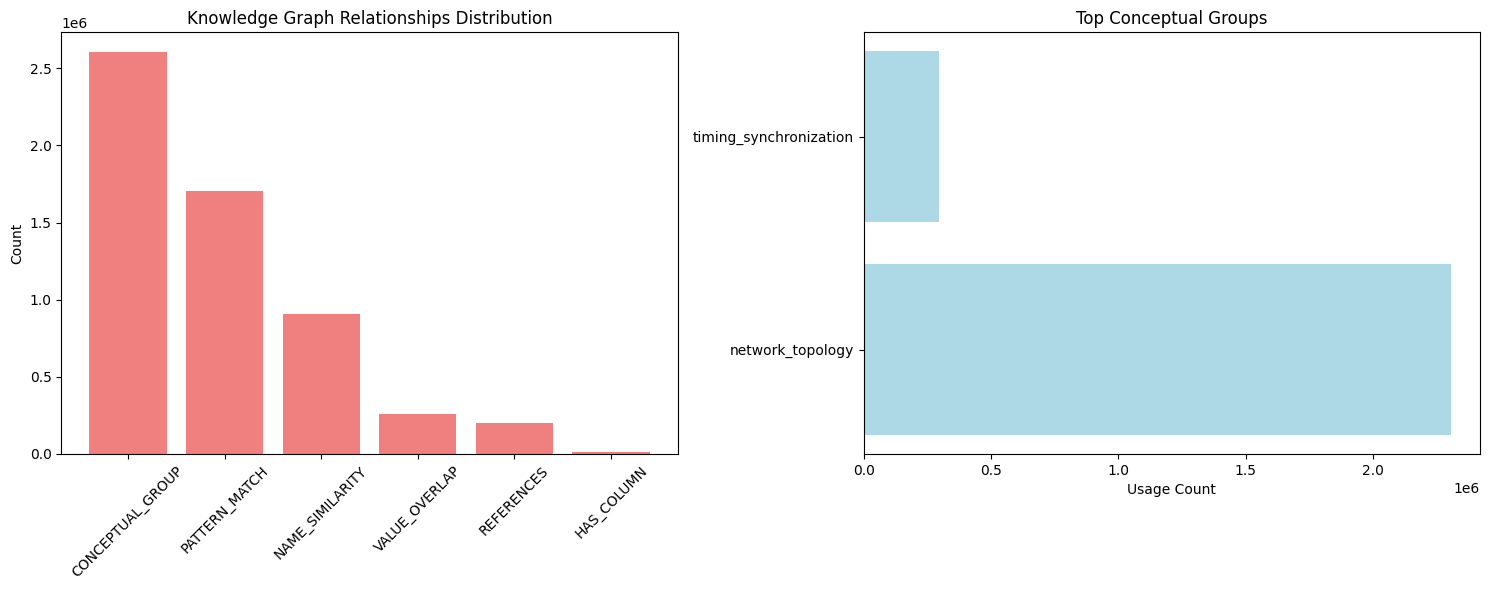


🎉 ENHANCED CHATBOT TESTING COMPLETE!
✅ Enhanced RAN-specific functionalities tested successfully
🧠 Domain intelligence and pattern recognition implemented
🔍 Advanced query processing and intent detection active
🚀 Ready for advanced RAN knowledge graph queries!

✅ Connection closed.


In [3]:
# Step 2: Test Enhanced Chatbot Functionality
print("💬 Testing enhanced RAN chatbot with various query types...")

# Enhanced test queries covering new functionalities
test_conversations = [
    "Show me all available tables",
    "Find tables related to cell_config", 
    "What is the schema overview?",
    "Get details about performance_counters",
    "Show me columns with frequency in the name",
    "Find similar tables to neighbor_relations",
    "Show me power domain insights",
    "Find frequency related patterns",
    "Search for performance concepts",
    "What timing synchronization data do we have?",
    "Show me configuration patterns",
    "Find traffic analysis tables"
]

print("\n" + "="*70)
print("🤖 ENHANCED RAN CHATBOT CONVERSATION DEMO")
print("="*70)

for i, query in enumerate(test_conversations, 1):
    print(f"\n👤 User Query {i}: {query}")
    print("-" * 60)
    
    try:
        # Process query with enhanced functionality
        result = chatbot.process_query(query)
        response = chatbot.generate_response(result)
        
        print(f"🤖 Assistant:\n{response}")
        print(f"\n📊 Query Analysis:")
        print(f"   • Type: {result['type']}")
        print(f"   • Intent: {chatbot.detect_intent(query)}")
        
        if 'domain' in result:
            print(f"   • Domain: {result['domain']}")
        if 'pattern_type' in result:
            print(f"   • Pattern: {result['pattern_type']}")
            
    except Exception as e:
        print(f"🤖 Assistant: Sorry, I encountered an error: {e}")
        import traceback
        traceback.print_exc()

# Step 3: Test RAN Domain Intelligence
print(f"\n\n🧠 Testing RAN Domain Intelligence...")

ran_domains = ['performance', 'power', 'frequency', 'topology', 'quality']

for domain in ran_domains:
    print(f"\n🔍 Analyzing {domain.upper()} domain:")
    try:
        insights = chatbot.query_interface.get_ran_domain_insights(domain)
        if 'error' not in insights:
            print(f"   • Related tables: {len(insights.get('related_tables', []))}")
            print(f"   • Domain patterns: {len(insights.get('domain_patterns', []))}")
            print(f"   • Keywords: {', '.join(insights.get('keywords_used', [])[:3])}")
        else:
            print(f"   • {insights['error']}")
    except Exception as e:
        print(f"   • Error: {e}")

# Step 4: Generate and Display Enhanced NER Training Data
print(f"\n\n🧠 Generating Enhanced NER Training Data...")

try:
    training_data = chatbot.ner_generator.generate_ner_training_data()
    print(f"✅ Generated {len(training_data)} training examples")
    
    # Show samples with better formatting
    print(f"\n📋 Sample Enhanced NER Training Data:")
    for i, (text, entities) in enumerate(training_data[:5], 1):
        print(f"{i}. Text: '{text}'")
        print(f"   Entities: {entities['entities']}")
        print()
        
except Exception as e:
    print(f"❌ Error generating NER data: {e}")

# Step 5: Enhanced Schema Analysis
print(f"\n📊 Enhanced Knowledge Graph Schema Analysis...")

try:
    schema = chatbot.query_interface.get_schema_overview()
    
    if schema:
        print(f"📋 Enhanced Schema Summary:")
        if 'tables' in schema:
            tables = schema['tables']
            print(f"  • Total Tables: {tables.get('total_tables', 0)}")
            if tables.get('avg_row_count'):
                print(f"  • Average Rows: {tables['avg_row_count']:.0f}")
            if tables.get('max_row_count'):
                print(f"  • Largest Table: {tables['max_row_count']:,} rows")
                
        if 'columns' in schema:
            columns = schema['columns']
            print(f"  • Total Columns: {columns.get('total_columns', 0)}")
            print(f"  • Unique Data Types: {columns.get('unique_data_types', 0)}")
            
        if 'relationships' in schema:
            total_rels = sum(r['count'] for r in schema['relationships'])
            print(f"  • Total Relationships: {total_rels:,}")
            
        if 'concepts' in schema:
            print(f"  • Conceptual Groups: {len(schema['concepts'])}")
            
        # Enhanced Visualizations
        if schema.get('relationships'):
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            # Relationship distribution
            rel_types = [r['relationship_type'] for r in schema['relationships']]
            rel_counts = [r['count'] for r in schema['relationships']]
            
            ax1.bar(rel_types, rel_counts, color='lightcoral')
            ax1.set_title('Knowledge Graph Relationships Distribution')
            ax1.set_ylabel('Count')
            ax1.tick_params(axis='x', rotation=45)
            
            # Conceptual groups distribution
            if schema.get('concepts'):
                concepts = schema['concepts'][:10]  # Top 10
                concept_names = [c['concept'] for c in concepts]
                concept_counts = [c['usage_count'] for c in concepts]
                
                ax2.barh(concept_names, concept_counts, color='lightblue')
                ax2.set_title('Top Conceptual Groups')
                ax2.set_xlabel('Usage Count')
            
            plt.tight_layout()
            plt.show()
            
except Exception as e:
    print(f"❌ Error analyzing enhanced schema: {e}")

print(f"\n🎉 ENHANCED CHATBOT TESTING COMPLETE!")
print("="*70)
print("✅ Enhanced RAN-specific functionalities tested successfully")
print("🧠 Domain intelligence and pattern recognition implemented")
print("🔍 Advanced query processing and intent detection active")
print("🚀 Ready for advanced RAN knowledge graph queries!")

# Cleanup
try:
    integrator.close()
    print("\n✅ Connection closed.")
except:
    pass